To show Mr. Nishantha a demo about allergen detection

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/product_info.csv'
data = pd.read_csv(file_path)

# View the first few rows
data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
data.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
data['primary_category'].value_counts()

,count
primary_category,
Skincare,2420
Makeup,2369
Hair,1464
Fragrance,1432
Bath & Body,405
Mini Size,288
Men,60
Tools & Brushes,52
Gifts,4


In [ ]:
# Define the path to your text file in Google Drive
harmful_ingredients_path = '/content/drive/My Drive/harmful_ingredients.txt'  # Adjust the path

# Load the text file and split by comma to get the list of harmful ingredients
with open(harmful_ingredients_path, 'r') as file:
    harmful_ingredients = file.read().split(',')

# Strip any extra whitespace from each ingredient
harmful_ingredients = [ingredient.strip() for ingredient in harmful_ingredients]

# Print the list to verify
print(harmful_ingredients)

['Latex', 'Amyl cinnamal', 'Amylcinnamyl alcohol', 'Anisyl alcohol', 'Benzyl alcohol', 'Benzyl benzoate', 'Benzyl cinnamate', 'Benzyl salicylate', 'Cinnamyl alcohol', 'Cinnamaldehyde', 'Citral', 'Citronellol', 'Coumarin', 'Eugenol', 'Farnesol', 'Geraniol', 'Hexyl', 'cinnamaladehyde', 'Hydroxycitronellal', 'Hydroxyisohexyl 3-cyclohexene carboxaldehyde', 'HICC', 'Lyral', 'Isoeugenol', 'Lilial', 'd-Limonene', 'Linalool', 'Methyl 2-octynoate', 'g-Methylionone', 'Oak moss extract', 'Tree moss extract', 'Methylisothiazolinone', 'Methylchloroisothiazolinone', 'Formaldehyde', 'formaldehyde', 'Bronopol', '2-bromo-2-nitropropane-1', '3-diol', '5-bromo-5-nitro-1', '3-dioxane\nDiazolidinyl urea', 'DMDM hydantoin', '3-dimethylol-5', '5-dimethylhydantoin', 'Imidazolidinyl urea', 'Sodium hydroxymethylglycinate', 'Quaternium-15', 'Dowicil 200', 'N-(3-chloroallyl) hexaminium chloride', 'p-phenylenediamine', 'PPD', 'Coal-tar', 'Nickel', 'Gold']


In [ ]:
# Ensure the ingredients column is in a string format
data['ingredients'] = data['ingredients'].astype(str)

# Tokenize each ingredient list in the dataset by splitting on commas
data['ingredients_list'] = data['ingredients'].apply(lambda x: [ingredient.strip() for ingredient in x.split(',')])

# View the preprocessed data
data[['product_name', 'ingredients_list']].head()

,product_name,ingredients_list
0,Fragrance Discovery Set,"[['Capri Eau de Parfum:', 'Alcohol Denat. (SD ..."
1,La Habana Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr..."
2,Rainbow Bar Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr..."
3,Kasbah Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr..."
4,Purple Haze Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr..."


In [ ]:
# Create a new column to store detected harmful ingredients
data['harmful_detected'] = data['ingredients_list'].apply(
    lambda ingredients: [ingredient for ingredient in ingredients if ingredient in harmful_ingredients]
)

# View the results
data[['product_name', 'ingredients_list', 'harmful_detected']].head()

,product_name,ingredients_list,harmful_detected
0,Fragrance Discovery Set,"[['Capri Eau de Parfum:', 'Alcohol Denat. (SD ...","[Linalool, Citral, Geraniol, Eugenol, Farnesol..."
1,La Habana Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr...","[Citral, Eugenol]"
2,Rainbow Bar Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr...","[Linalool, Coumarin, Eugenol, Citral, Isoeugenol]"
3,Kasbah Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr...","[Eugenol, Linalool, Citronellol, Geraniol]"
4,Purple Haze Eau de Parfum,"[['Alcohol Denat. (SD Alcohol 39C), Parfum (Fr...","[Geraniol, Linalool, Coumarin, Farnesol, Eugenol]"


In [ ]:
# Count harmful ingredients for each product
data['harmful_count'] = data['harmful_detected'].apply(len)

# View the results
data[['product_name', 'harmful_detected', 'harmful_count']].head()


,product_name,harmful_detected,harmful_count
0,Fragrance Discovery Set,"[Linalool, Citral, Geraniol, Eugenol, Farnesol...",26
1,La Habana Eau de Parfum,"[Citral, Eugenol]",2
2,Rainbow Bar Eau de Parfum,"[Linalool, Coumarin, Eugenol, Citral, Isoeugenol]",5
3,Kasbah Eau de Parfum,"[Eugenol, Linalool, Citronellol, Geraniol]",4
4,Purple Haze Eau de Parfum,"[Geraniol, Linalool, Coumarin, Farnesol, Eugenol]",5


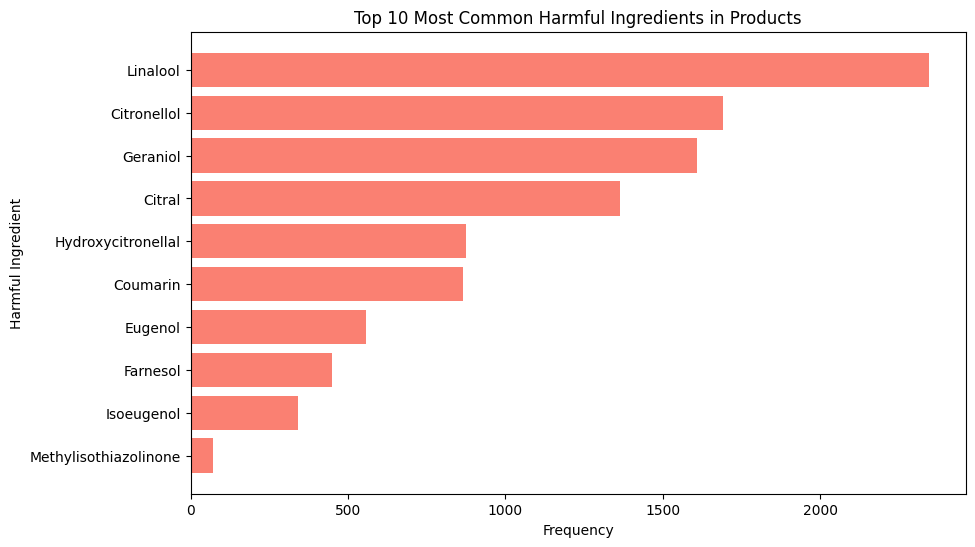

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of all harmful ingredients
harmful_flat = [item for sublist in data['harmful_detected'] for item in sublist]

# Count frequency of each harmful ingredient
harmful_counts = Counter(harmful_flat)

# Plot the most common harmful ingredients
common_harmful = harmful_counts.most_common(10)
ingredients, counts = zip(*common_harmful)

plt.figure(figsize=(10, 6))
plt.barh(ingredients, counts, color='salmon')
plt.xlabel('Frequency')
plt.ylabel('Harmful Ingredient')
plt.title('Top 10 Most Common Harmful Ingredients in Products')
plt.gca().invert_yaxis()
plt.show()
